In [1]:
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
# Data we need for NLTK
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pradip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pradip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pradip\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### 3 Steps:

1. Create the model

model = modelyoulike()

2. Train/fit the model

model.fit(X_train,Y_train)

3. Check the model's performance

model.score(X_train,Y_train)

model.score(X_test,Ytest)

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
df = pd.read_csv('bbc_text.csv')


In [6]:
df.head()

,labels,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [7]:
# Here we have two columns: Text column contain documents and text column contain label for each document

In [8]:
# Assign two separate variables  
inputs = df['text']
labels = df['labels']

<Axes: >

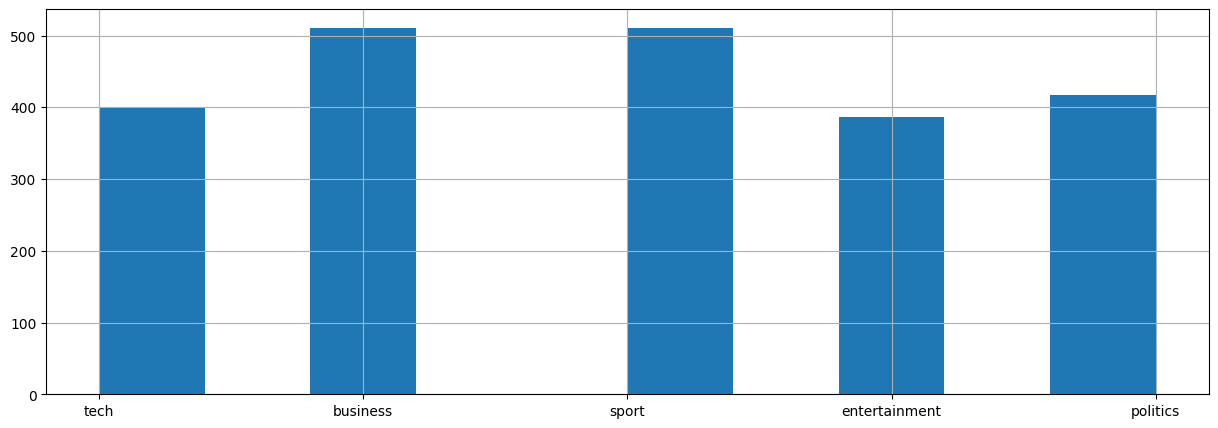

In [9]:
# check the data contribution for each  
labels.hist(figsize = (15,5))

In [10]:
inputs_train,inputs_test,Ytrain,Ytest = train_test_split(inputs,labels, random_state= 123)

In [11]:
vectorizer = CountVectorizer()

In [12]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
# Why we define one with fit_transform and one just with transform?

* Training data is supposed to represent what we have when we build our model, test data is supposed to represent what we have when we apply out model to data we haven't seen before

* As such, we would not want to fit on the test data because that's not how test data will be used 

In [13]:
Xtrain

<1668x25997 sparse matrix of type '<class 'numpy.int64'>'
	with 336528 stored elements in Compressed Sparse Row format>

In [14]:
(Xtrain != 0 ).sum()

336528

In [15]:
# With precentages of non zero values 
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.007760718378407248

less than the one percent of the matrix contains non-zero values

In [16]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)

MultinomialNB()

In [17]:
# check the performance, the [score] function return the accuracy
print("train_score:", model.score(Xtrain,Ytrain))
print("test score:", model.score(Xtest,Ytest))

train_score: 0.9928057553956835
test score: 0.9766606822262118


The score is pretty good, let's check with other variations 

### with Stopwords:

By default stopwords are not removed. so let's right code for it in single block


In [18]:
vectorizer = CountVectorizer(stop_words= 'english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest,Ytest))

train score: 0.9940047961630696
test score: 0.9730700179533214


In [19]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [20]:
class LemmaTikenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos = get_wordnet_pos(tag)) \
                 for word,tag in words_and_tags]

In [21]:
# With lemmatization
vectorizer = CountVectorizer(tokenizer= LemmaTikenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score:", model.score(Xtrain,Ytrain))
print("test score:", model.score(Xtest,Ytest))

c:\Users\Pradip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9946043165467626
test score: 0.9730700179533214


In [23]:
class stemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()

    def __call__(self,doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [24]:
# With stemming
vectorizer = CountVectorizer(tokenizer= stemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest,Ytest))

c:\Users\Pradip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9922062350119905
test score: 0.9748653500897666


In [25]:
def simple_tokenizer(s):
    return s.split()

In [27]:
# String split tokenizer:
vectorizer = CountVectorizer(tokenizer = simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score:", model.score(Xtrain,Ytrain))
print("test score:", model.score(Xtest,Ytest))

c:\Users\Pradip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9934052757793765
test score: 0.9694793536804309


It's not at all clear which method will perform best before you even try. Often times people assume that the most complex method will perform best.

In this case, that was Lemitization. In fact, led to the worst performance out of all hte experiments we tried. However, also note that this was just for a single instance of the experiment.